In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## PCA usig pca library

In [2]:
df = pd.read_csv("pca_gsp.csv")
df.head()

,State,Ag,Mining,Constr,Manuf,Manuf_nd,Transp,Comm,Energy,TradeW,TradeR,RE,Services,Govt
0,AL,2.0,1.5,4.2,10.5,11.8,2.9,2.9,3.6,6.3,9.9,12.800000,16.100000,15.5
1,AK,1.5,22.4,4.1,1.1,3.7,12.1,2.0,1.5,2.9,6.5,10.700000,11.900000,19.6
2,AZ,1.7,1.3,5.8,11.5,3.0,2.8,2.2,2.7,6.3,10.5,18.900000,20.200001,13.0
3,AR,5.1,1.0,4.0,12.8,11.8,4.4,2.4,4.2,6.1,10.2,11.400000,14.800000,11.8
4,CA,2.1,0.6,3.3,9.0,5.0,2.6,2.5,1.8,6.8,8.9,22.700001,23.100000,11.5


In [3]:
df.describe()

,Ag,Mining,Constr,Manuf,Manuf_nd,Transp,Comm,Energy,TradeW,TradeR,RE,Services,Govt
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2.480000,2.624000,4.338000,9.78400,7.696000,3.47600,2.398000,3.112000,6.348000,9.002000,17.090000,18.712000,12.934000
std,2.394552,5.808704,0.899408,4.76391,3.927037,1.66213,0.870489,1.147071,1.308253,1.197871,5.220965,3.728962,2.798003
min,0.500000,0.000000,2.900000,0.80000,1.700000,1.50000,1.300000,1.000000,2.900000,6.000000,10.400000,9.600000,9.000000
25%,1.025000,0.200000,3.825000,6.25000,4.500000,2.65000,1.900000,2.500000,5.825000,8.600000,13.150000,16.150000,10.900000
50%,1.800000,0.450000,4.200000,10.40000,7.150000,3.20000,2.100000,2.950000,6.300000,8.900000,16.200000,18.399999,12.250000
75%,2.525000,1.650000,4.675000,12.37500,10.500000,3.87500,2.875000,3.600000,7.275000,9.850000,19.150001,20.774999,14.550000
max,10.600000,31.600000,8.400000,21.40000,16.700001,12.10000,5.700000,7.500000,9.100000,11.500000,35.400002,32.299999,21.299999


<AxesSubplot:>

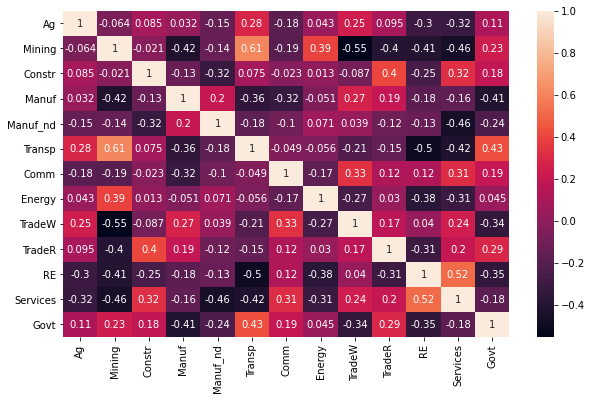

In [4]:
plt.figure(figsize=(10,6))
correlation = df.corr()
sns.heatmap(correlation, annot= True)

In [5]:
df.columns

Index(['State', 'Ag', 'Mining', 'Constr', 'Manuf', 'Manuf_nd', 'Transp',
       'Comm', 'Energy', 'TradeW', 'TradeR', 'RE', 'Services', 'Govt'],
      dtype='object')

In [6]:
features = ['Ag', 'Mining', 'Constr', 'Manuf', 'Manuf_nd', 'Transp','Comm', 'Energy', 'TradeW', 'TradeR', 'RE', 'Services', 'Govt']

In [7]:
x = df.loc[:, features].values

In [8]:
states = df.State

In [9]:
from pca import pca

In [10]:
model = pca(n_components=5,normalize=True)

In [11]:
result = model.fit_transform(x)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [12]:
##result

In [13]:
loadings = result['loadings']
loadings

,1,2,3,4,5,6,7,8,9,10,11,12,13
PC1,0.134820,0.469700,0.035287,-0.183356,-0.009706,0.418473,-0.151903,0.246936,-0.315267,-0.090136,-0.363072,-0.379879,0.288838
PC2,-0.007463,-0.001482,0.393454,-0.375743,-0.458832,0.146961,0.315785,-0.137977,-0.028306,0.261047,0.030264,0.383916,0.368534
PC3,-0.385007,0.259702,-0.257190,-0.375393,-0.035692,-0.006358,0.082061,-0.068869,-0.290139,-0.507233,0.446613,0.127475,-0.085371
PC4,-0.373135,0.065351,0.349857,0.146831,-0.045498,-0.365115,-0.343013,0.416093,-0.441910,0.227277,-0.012208,0.182733,-0.076742
PC5,0.410926,0.063910,0.196051,0.111228,-0.465268,0.142587,-0.549849,-0.201798,-0.009907,-0.252262,0.173118,0.125468,-0.294854


In [14]:
scores=result['PC']
scores['labels'] = states
scores.head()

,PC1,PC2,PC3,PC4,PC5,labels
1.0,0.489633,-0.284015,-0.920527,0.087859,-1.753605,AK
1.0,6.685223,1.542226,2.725341,-2.093831,0.962152,AK
1.0,-0.751746,1.488459,-0.864409,1.239478,0.701332,AK
1.0,1.000034,-1.252704,-1.797053,-0.159525,-0.628676,AK
1.0,-1.814395,0.308317,1.072827,-0.620970,0.587344,AK


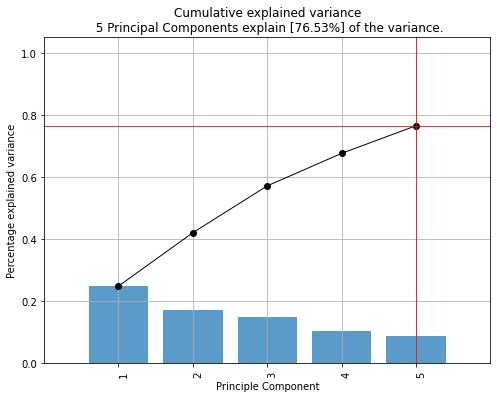

<Figure size 432x288 with 0 Axes>

In [15]:
model.plot(figsize=(8,6))
plt.show()

## PCA biplots displays both PC scores and PC loadings

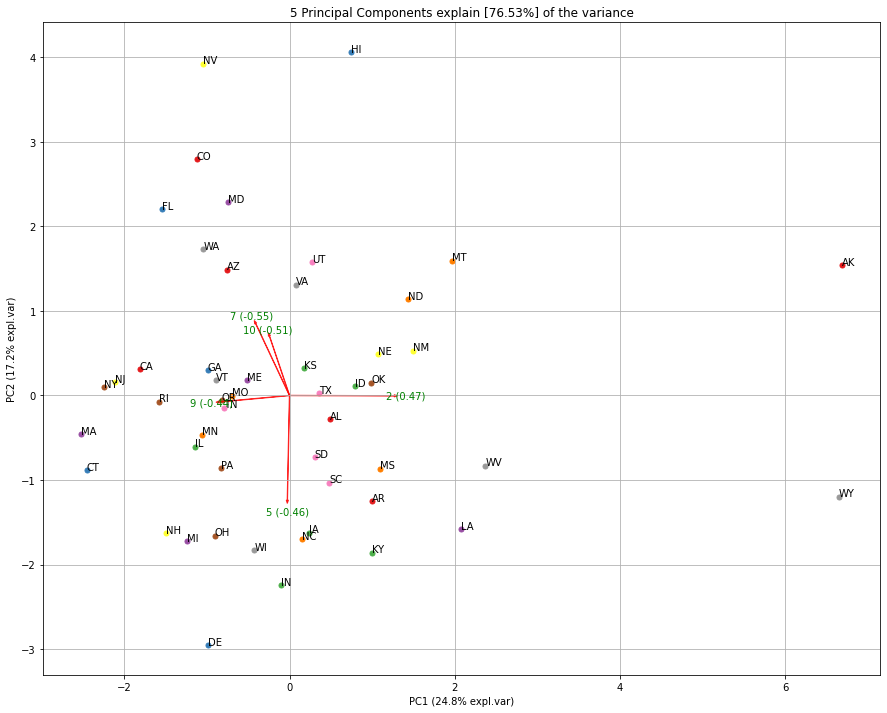

In [18]:
model.biplot(n_feat=5,legend=False,figsize=(15,12),y=states,label=True)
plt.show()

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [76.53%] of the variance'}, xlabel='PC1 (24.8% expl.var)', ylabel='PC2 (17.2% expl.var)'>)

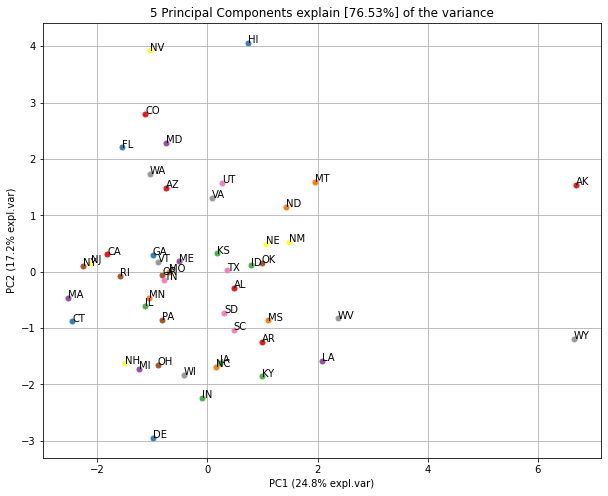

In [22]:
model.scatter(legend=False,y=states)